In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.mosaicplot import mosaic
from bubble_plot.bubble_plot import bubble_plot
%matplotlib inline

In [49]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python')


In [50]:
def clean_data (dataset) :
    
    #Remove the rows having '?'
    dataset = dataset[~(dataset[columns] == '?').any(axis=1)]
    
    #Remove rows having 'NaN'
    dataset = dataset.dropna()
    
    #Reset index
    dataset = dataset.reset_index(drop=True)
    
    # Replace '>50K.' with '>50K' and '<=50K.' with '<=50K' 
    dataset = dataset.replace('>50K.', '>50K')
    dataset = dataset.replace('<=50K.', '<=50K')
    
    return dataset

In [51]:
def concatDataframe (dataset1, dataset2):
    return pd.concat([dataset1, dataset2], ignore_index=True)

In [52]:
def col_vs_income(labels, less_than_fifty, greater_than_fifty, title, xlabel, ylabel):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, less_than_fifty, width, label='<=50K')
    rects2 = ax.bar(x + width/2, greater_than_fifty, width, label='>50K')

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.xticks(rotation=90)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()

    plt.show()

In [53]:
def get_count_df_normalized(concatenate_dataset, colname, percent=True):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    #Normalize data
    col_income['Total'] = col_income['<=50K'] + col_income['>50K']
    
    if (percent):        
        col_income['<=50K%'] = round((col_income['<=50K'] / col_income['Total']) * 100)
        col_income['>50K%'] = round((col_income['>50K'] / col_income['Total']) * 100)
    else:
        col_income['<=50K%'] = col_income['<=50K'] / col_income['Total']
        col_income['>50K%'] =  col_income['>50K'] / col_income['Total']
            
    col_income[colname] = col_income.T.columns

    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K%'].tolist(),
            '>50K':col_income['>50K%'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [54]:
def get_count_df_absolute(concatenate_dataset, colname):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    col_income[colname] = col_income.T.columns
    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K'].tolist(),
            '>50K':col_income['>50K'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [55]:
def plot_bar_chart(colname, title, xlabel, ylabel, abs_or_norm = False):
    if(abs_or_norm):
        col_income_dict = get_count_df_absolute(concatenate_dataset, colname) 
    else:
        col_income_dict = get_count_df_normalized(concatenate_dataset, colname)
    #Plot the comparision between WorkClass and Income
    col_vs_income(col_income_dict[colname].tolist(), col_income_dict['<=50K'].tolist(), col_income_dict['>50K'].tolist(), title, xlabel, ylabel)

In [56]:
def plot_box_plot(colname, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    sns.boxplot(ax=ax, x='Income', y=colname, data = train_data)

In [79]:
def emptyLabelMosaic(k):
    return ''

def create_mulitvariate_mosaicplots(col1, col2, col3,title):
    plt.rcParams["figure.figsize"]=(15, 10)
    mosaic(concatenate_dataset, [col1,col2,col3],
           gap=0.015, 
           label_rotation=45.0, 
           horizontal=False,
           title=title, 
           labelizer=emptyLabelMosaic,)
    plt.show()

In [58]:
train_data = clean_data(train_data)
test_data = clean_data(test_data)
concatenate_dataset = concatDataframe(train_data, test_data)

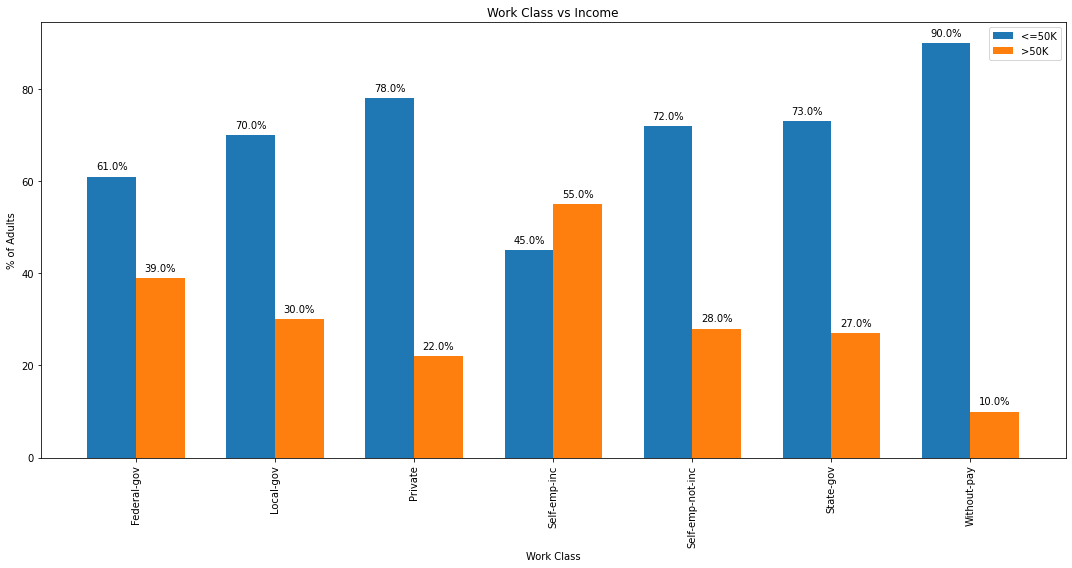

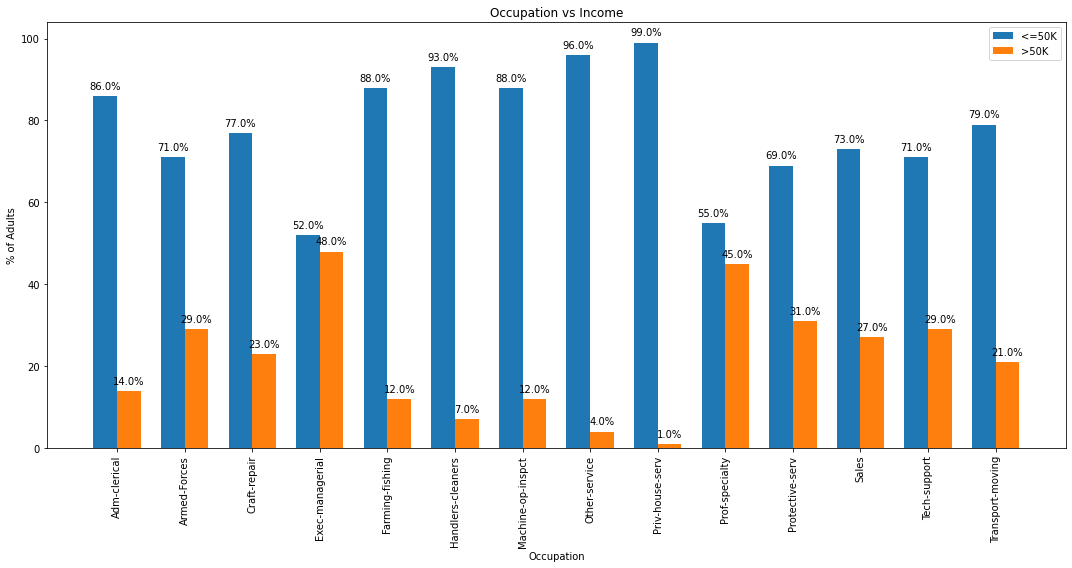

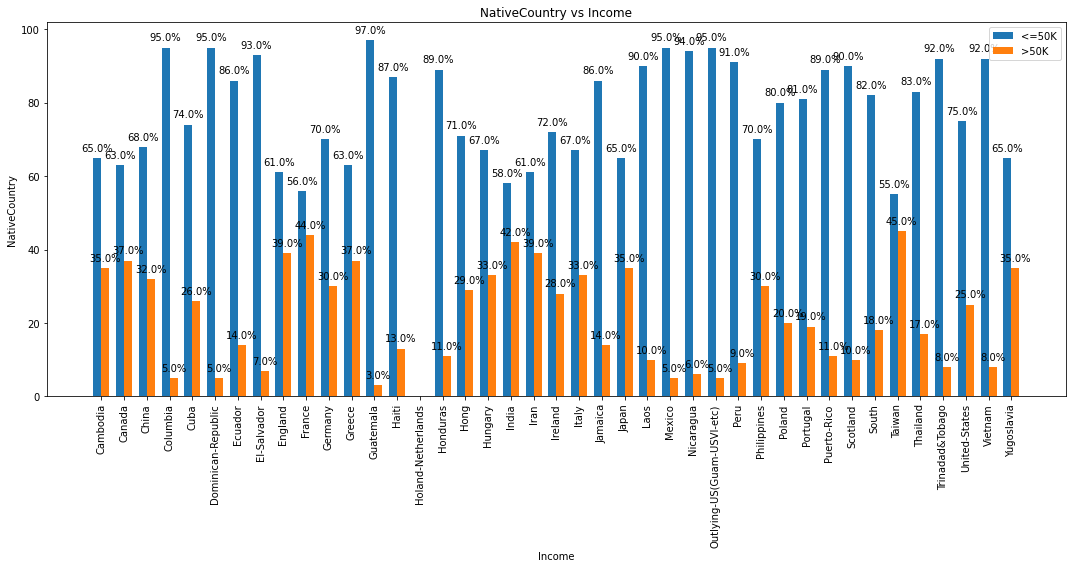

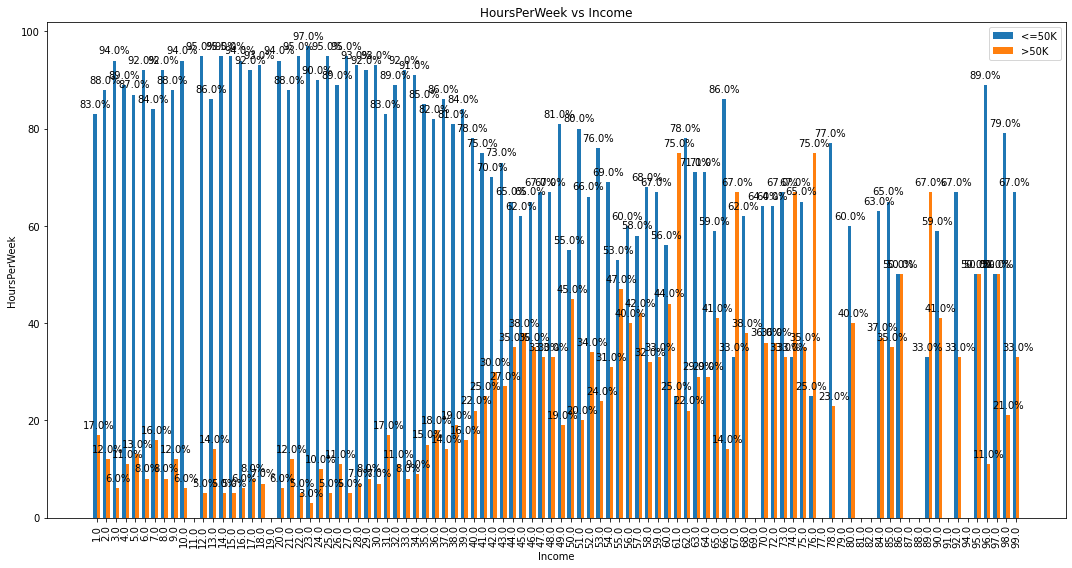

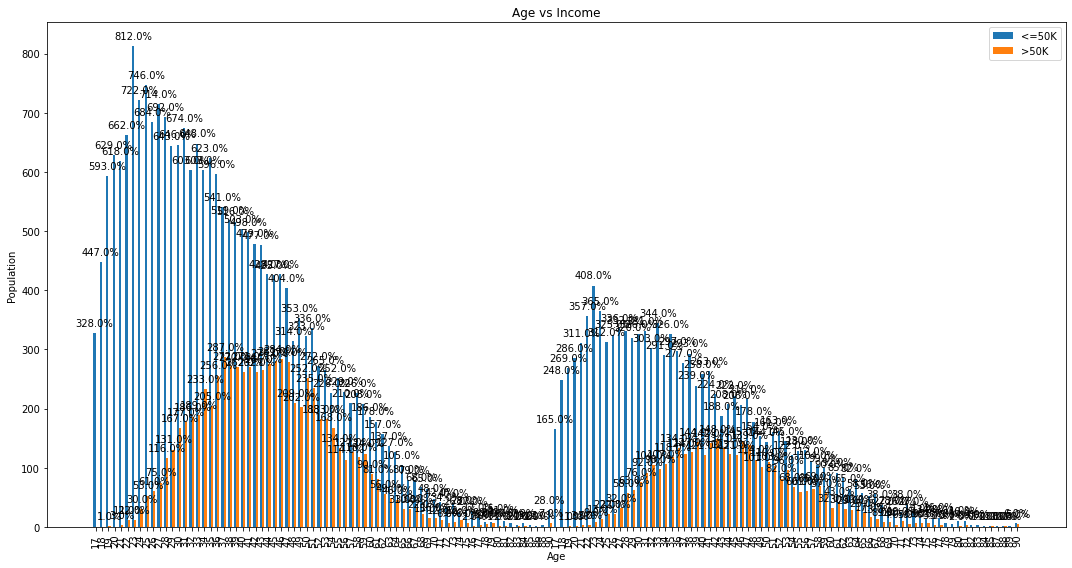

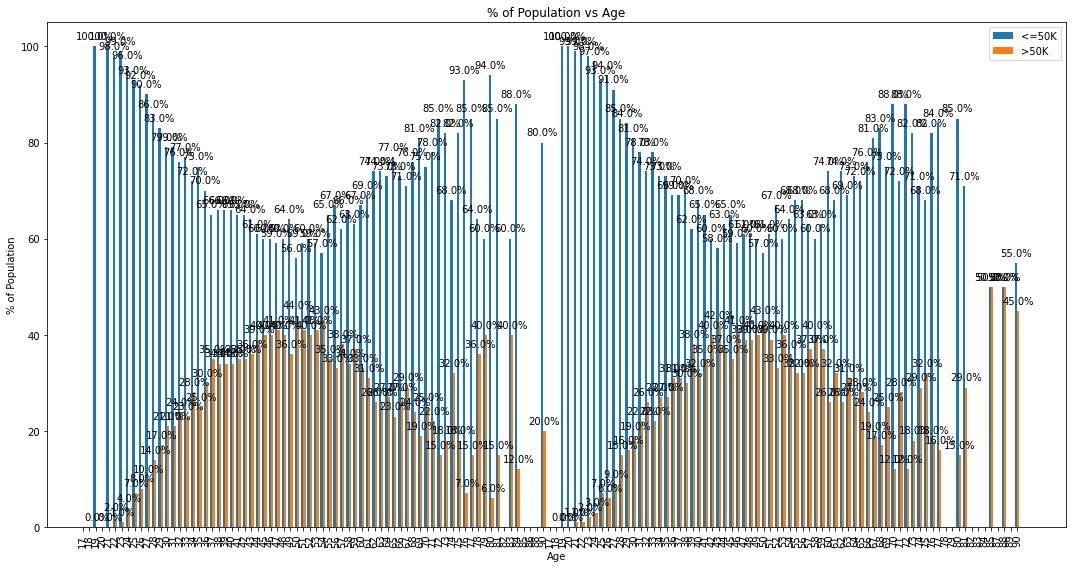

In [65]:
#plot_bar_chart( colname, chart_title, x_label, y_label, absolute_or_normalized(default false))
plot_bar_chart('WorkClass', 'Work Class vs Income', 'Work Class', '% of Adults')
plot_bar_chart('Occupation', 'Occupation vs Income', 'Occupation', '% of Adults')
plot_bar_chart('NativeCountry', 'NativeCountry vs Income', 'Income', 'NativeCountry')
plot_bar_chart('HoursPerWeek', 'HoursPerWeek vs Income', 'Income', 'HoursPerWeek')
plot_bar_chart('Age', 'Age vs Income', 'Age', 'Population', True)
plot_bar_chart('Age', '% of Population vs Age', 'Age', '% of Population')


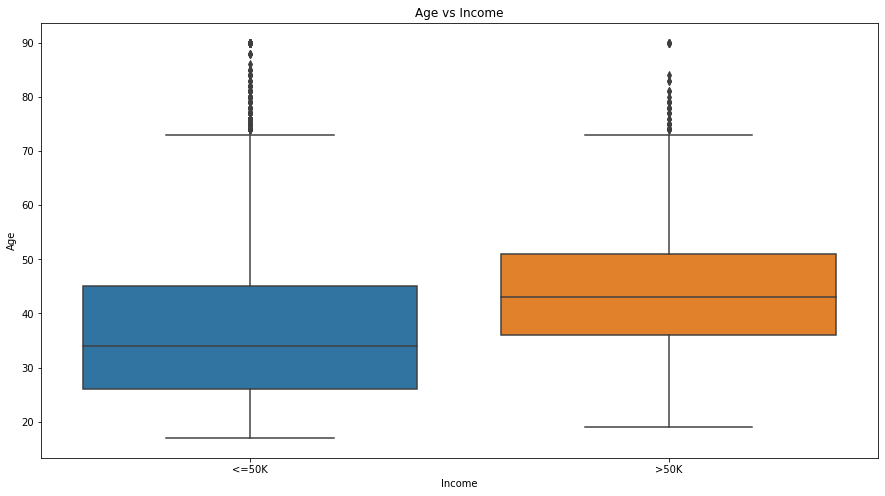

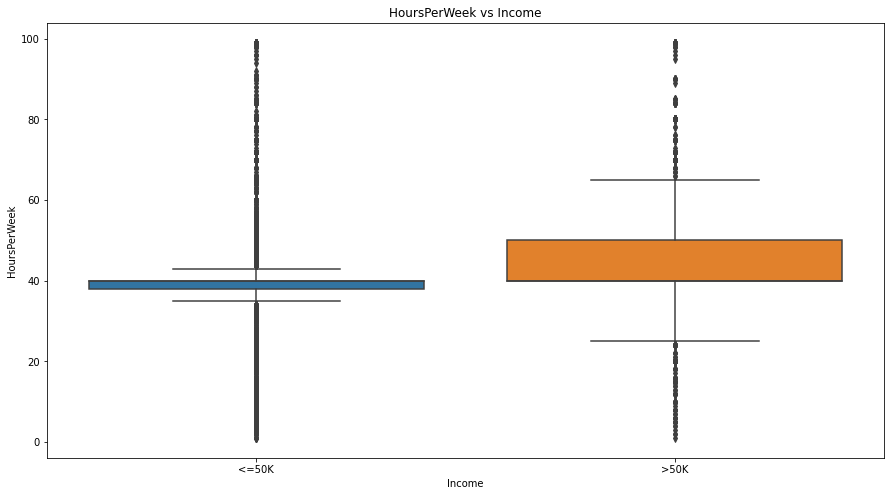

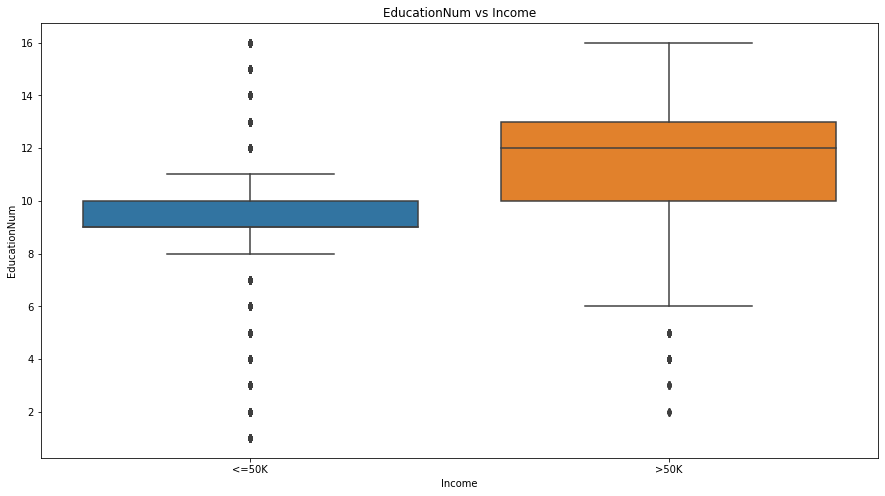

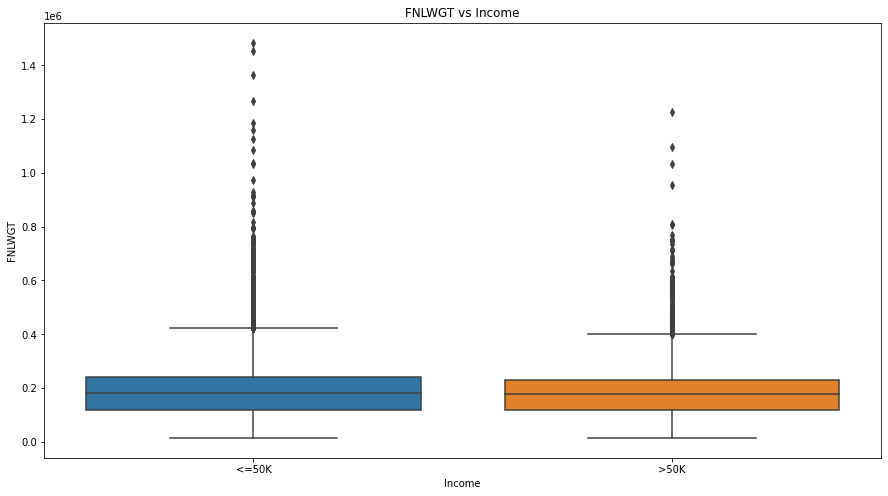

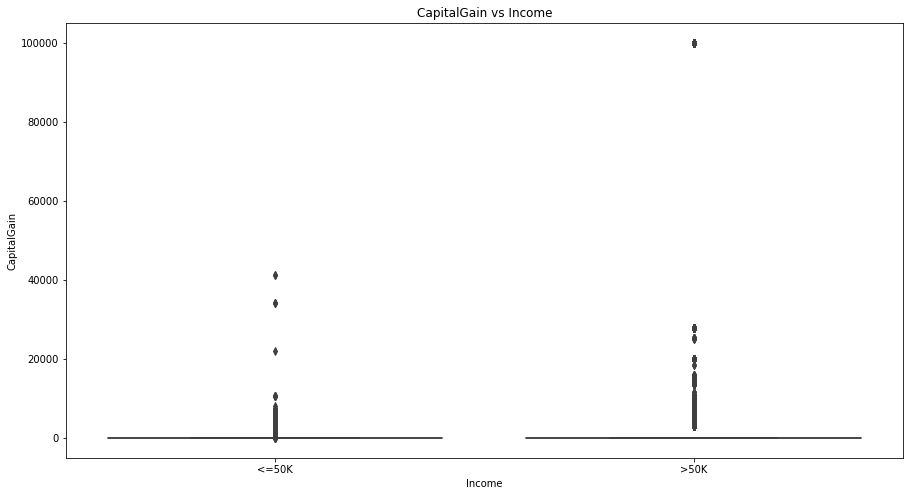

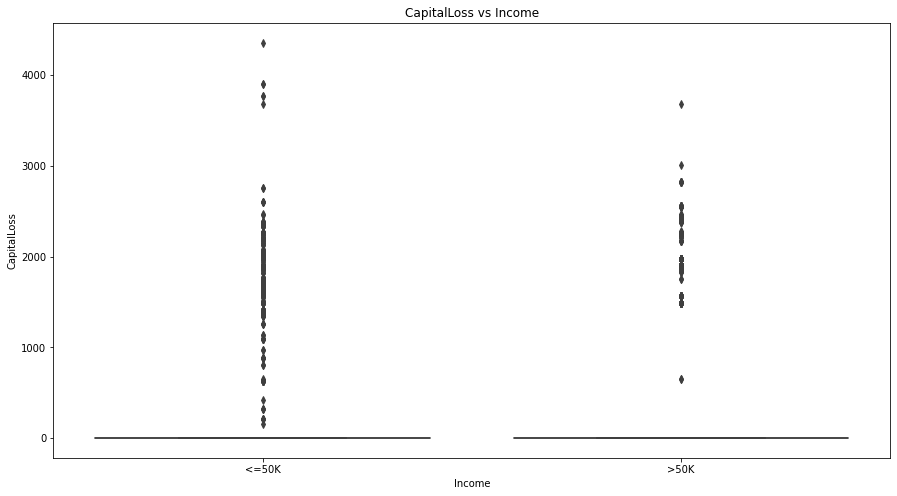

In [60]:
#plot_bar_chart( colname, chart_title, x_label, y_label)
plot_box_plot('Age', 'Age vs Income', 'Income', 'Age')
plot_box_plot('HoursPerWeek', 'HoursPerWeek vs Income', 'Income', 'HoursPerWeek')
plot_box_plot('EducationNum', 'EducationNum vs Income', 'Income', 'EducationNum')
plot_box_plot('FNLWGT', 'FNLWGT vs Income', 'Income', 'FNLWGT')
plot_box_plot('CapitalGain', 'CapitalGain vs Income', 'Income', 'CapitalGain')
plot_box_plot('CapitalLoss', 'CapitalLoss vs Income', 'Income', 'CapitalLoss') 

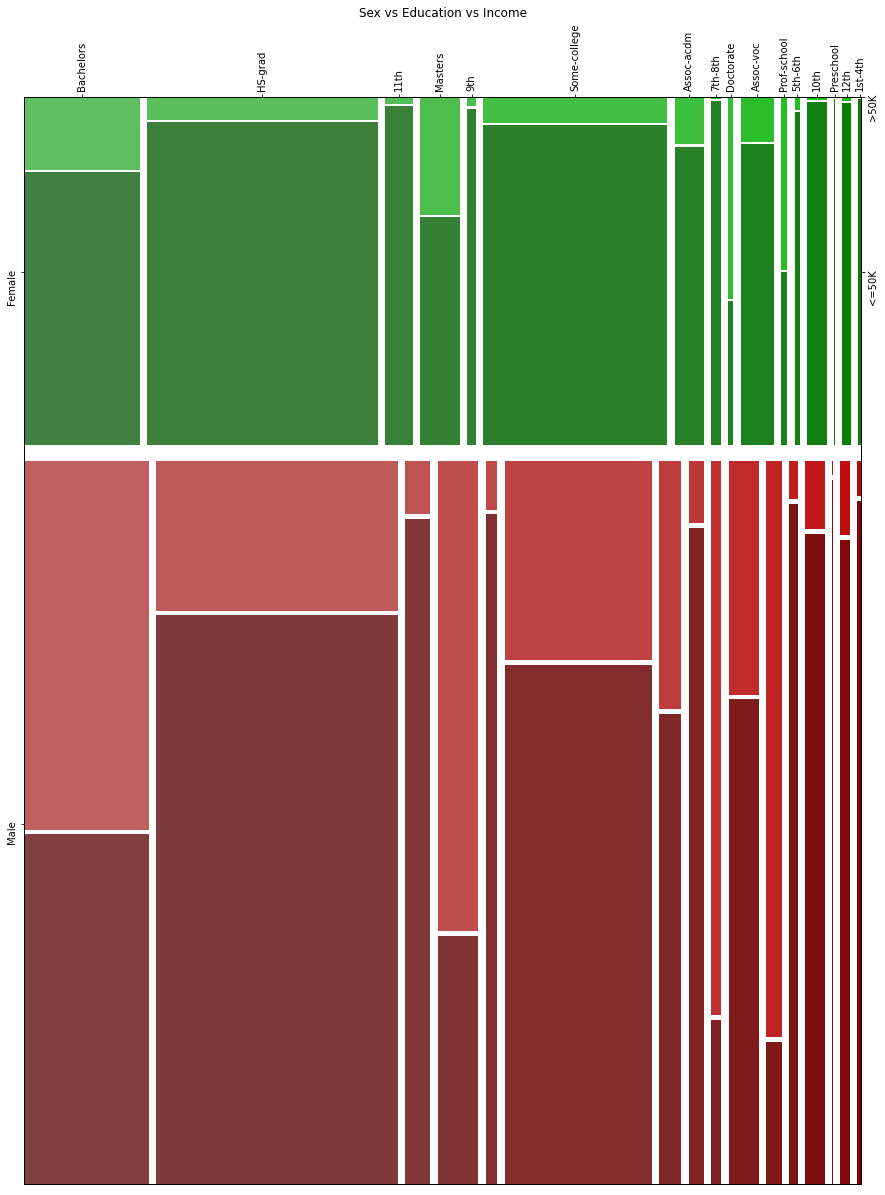

In [68]:
create_mulitvariate_mosaicplots('Sex','Education','Income', 'Sex vs Education vs Income')

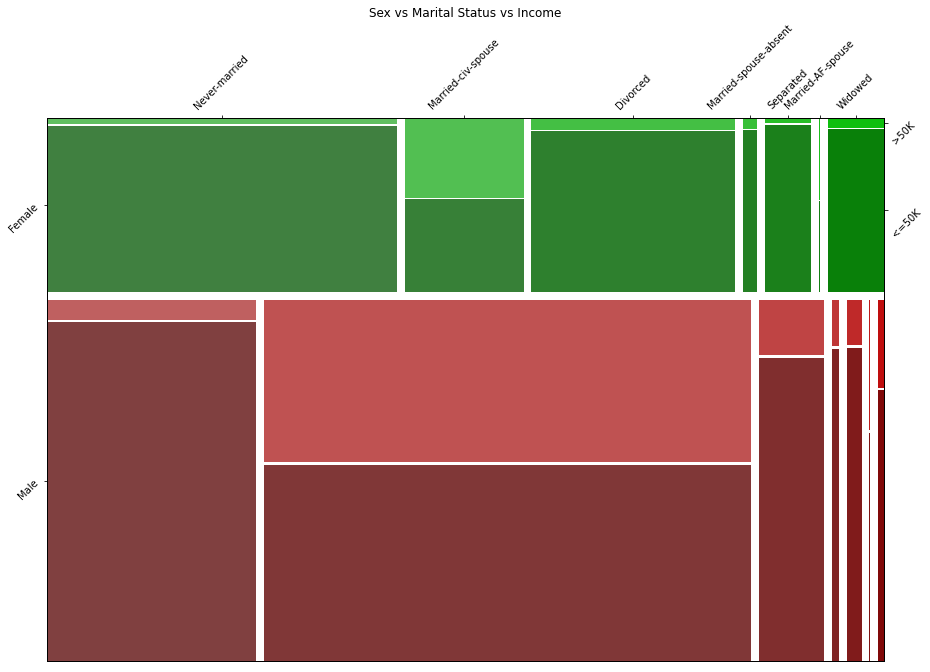

In [82]:
create_mulitvariate_mosaicplots('Sex','MaritalStatus','Income', 'Sex vs Marital Status vs Income')

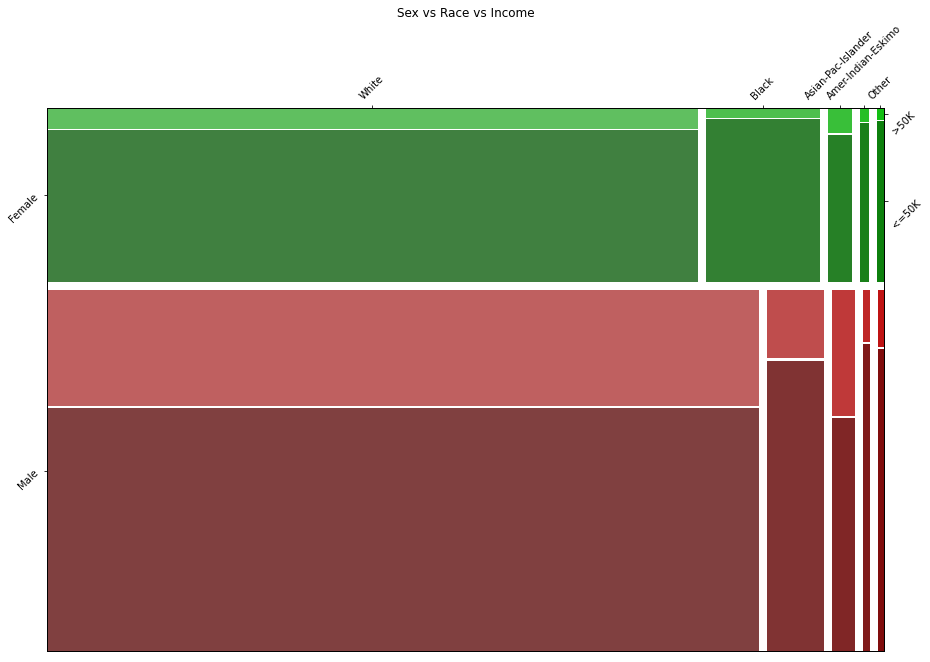

In [81]:
create_mulitvariate_mosaicplots('Sex','Race','Income', 'Sex vs Race vs Income')

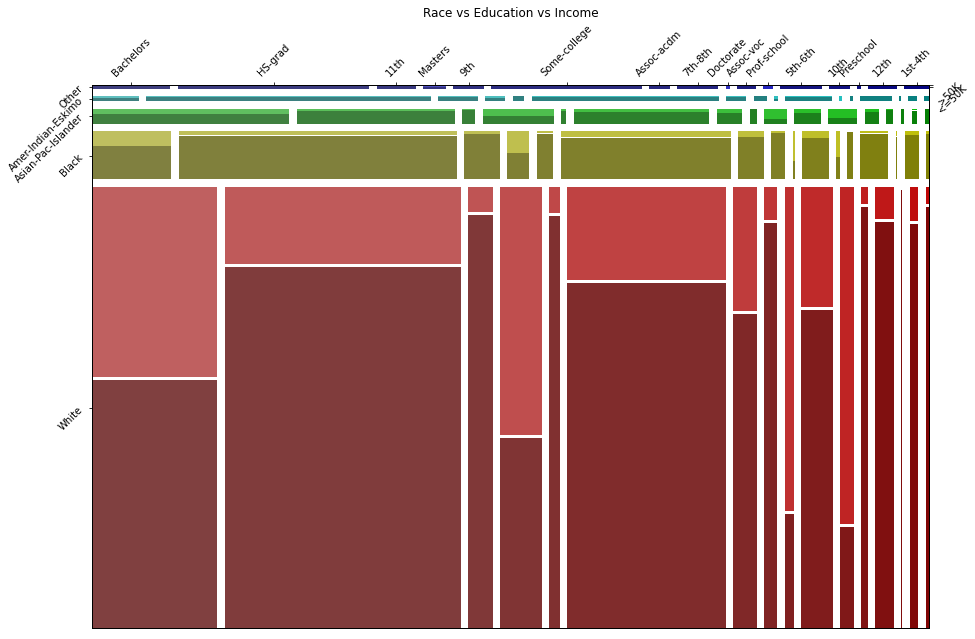

In [83]:
create_mulitvariate_mosaicplots('Race','Education','Income', 'Race vs Education vs Income')

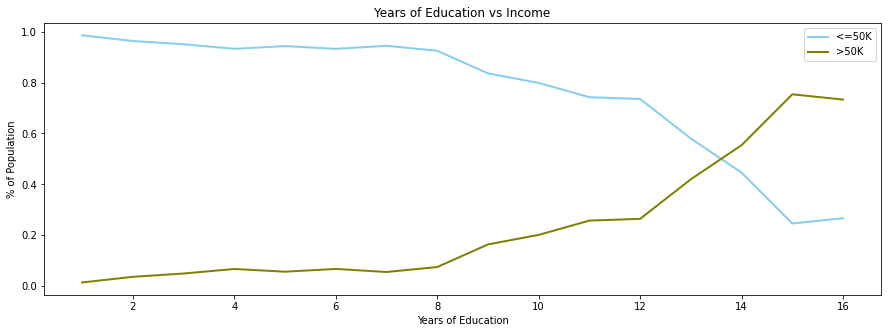

In [64]:
educationNum_vs_income = get_count_df_normalized(concatenate_dataset, 'EducationNum', percent=False)
plt.figure(figsize=(15,5))
plt.plot( 'EducationNum', '<=50K', data=educationNum_vs_income, color='skyblue', linewidth=2)
plt.plot( 'EducationNum', '>50K', data=educationNum_vs_income,  color='olive', linewidth=2)
plt.xlabel('Years of Education')
plt.ylabel('% of Population')
plt.title('Years of Education vs Income')
plt.legend()
plt.show()